In [3]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
paris_wifi='C:/Users/Seonghwan/Desktop/folium/data/paris_wifi.csv'
data_wifi=pd.read_table(paris_wifi, sep=';')
data_wifi

C:\Users\Seonghwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Nomdusite,Adresse,Codepostal,Code Site,Nombre de bornes,Etat du site,geo_shape,geo_point_2d
0,MAIRIE DU 1 ER,4 PLACE DU LOUVRE,75001,PW0127,2,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3410644761...","48.8600835266,2.34106447616"
1,MEDIATHEQUE LA CANOPEE LA FONTAINE,10 PASSAGE DE LA CANOPEE,75001,PW0143,5,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3476439032...","48.8618194855,2.34764390328"
2,MEDIATHEQUE MUSICALE DE PARIS (HALLES),8 PORTE SAINT EUSTACHE,75001,PW0020,2,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3459161050...","48.862650133,2.34591610501"
3,BERGES RIVE DROITE - PONT NEUF,BERGE DE SEINE RIVE DROITE - SORTIE TUNNEL TUI...,75001,PW0149,1,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3358223560...","48.8593733254,2.33582235605"
4,BIBLIOTHEQUE DU CINEMA FRANCOIS TRUFFAUT,14 RUE DES PROUVAIRES,75001,PW0112,1,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3441541095...","48.8614889106,2.34415410951"
5,MAISON DE LA VIE ASSOCIATIVE ET CITOYENNE 1,5B RUE DU LOUVRE,75001,PW0148,2,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3411567550...","48.8618833615,2.341156755"
6,BERGES RIVE DROITE - PONT AU CHANGE,BERGE DE SEINE RIVE DROITE - VIA FERRATA,75001,PW0158,1,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3465630426...","48.8575127839,2.34656304265"
7,JARDIN NELSON MANDELA,32 RUE BERGER,75001,PW0110,2,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3463037240...","48.8614694222,2.34630372401"
8,BERGES RIVE DROITE - PONT AU CHANGE,BERGE DE SEINE RIVE DROITE - SORTIE CHATELET,75001,PW0193,1,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3470199244...","48.8574278537,2.34701992447"
9,MAISON DE LA VIE ASSOCIATIVE ET CITOYENNE 2,23 RUE GRENETA,75002,PW0036,1,Opérationnel,"{""type"": ""Point"", ""coordinates"": [2.3505494031...","48.8650814049,2.35054940319"


In [6]:
list_geo_point=data_wifi['geo_point_2d']
list_geo_point_str=data_wifi.geo_point_2d.tolist()
list_geo_point_str
#results = list(map(int, results))
#list_geo_point_float=list(map(float, list_geo_point_str))
#data_wifi['geo_shape'][0]
newList=[]
for element in list_geo_point_str:
   newList.extend(element.split(','))
newList
len(newList)
horizon=[]
verti=[]
i=0
for x in newList:
    if i%2==0:
        horizon.append(x)
    else:
        verti.append(x)
    i=i+1
horizon_float=list(map(float,horizon))
verti_float=list(map(float,verti))

In [12]:
adresse=data_wifi.Adresse.tolist()
nom=data_wifi.Nomdusite.tolist()


In [14]:
paris2 = folium.Map(location=[48.853362, 2.348696], zoom_start=15)

for i in range(252):
    folium.Marker(location=(horizon_float[i],verti_float[i]), tooltip=nom[i], popup=adresse[i]).add_to(paris2)

paris2.save(outfile='C:/Users/Seonghwan/Desktop/folium/datamap_paris_wifi.html')
paris2

In [15]:
code_postal=data_wifi['Codepostal']
cp=pd.DataFrame(code_postal)
cp['Codepostal'].value_counts()

75013    28
75004    23
75019    20
75012    19
75020    17
75011    15
75018    14
75014    14
75016    13
75015    12
75007    10
75005    10
75010    10
75009     9
75001     9
75017     8
75008     8
75006     5
75002     4
75003     4
Name: Codepostal, dtype: int64

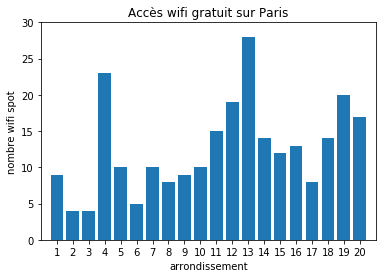

In [17]:
y_nb_wifi=(9,4,4,23,10,5,10,8,9,10,15,19,28,14,12,13,8,14,20,17)
x_arrt=np.arange(1,21)
n_groups = len(x_arrt)
index = np.arange(n_groups)
plt.bar(index, y_nb_wifi, tick_label=x_arrt, align='center')
plt.xlabel('arrondissement')
plt.ylabel('nombre wifi spot')
plt.title('Accès wifi gratuit sur Paris')
plt.xlim( -1, n_groups)
plt.ylim( 0, 30)
plt.show()

In [18]:
nb_wifi_par_arrt=pd.DataFrame(y_nb_wifi, x_arrt)
nb_wifi_par_arrt.columns=['nombre point wifi']
nb_wifi_par_arrt.index.name=['arrt']
nb_wifi_par_arrt

,nombre point wifi
[arrt],
1,9
2,4
3,4
4,23
5,10
6,5
7,10
8,8
9,9
